In [11]:
import os
import pyproj
os.environ["PROJ_LIB"] = "/opt/anaconda3/envs/titiler/share/proj"
print(os.environ["PROJ_LIB"])
pyproj.datadir.set_data_dir("/opt/anaconda3/envs/titiler/share/proj")

/opt/anaconda3/envs/titiler/share/proj


In [2]:
# import pyproj as pyproj
# print(pyproj.datadir.get_data_dir())
# pyproj.datadir.set_data_dir("/opt/anaconda3/envs/titiler/share/proj")
# pyproj.set_use_global_context("/opt/anaconda3/envs/titiler/share/proj")
# print(pyproj.datadir.get_data_dir())


In [12]:
from rio_tiler.io import COGReader
import rasterio
import rio_tiler

print(rio_tiler.__version__)

proj_params = {'a': 6371229,
   'b': 6371229,
   'proj': 'lcc',
   'lon_0': 262.5,
   'lat_0': 38.5,
   'lat_1': 38.5,
   'lat_2': 38.5}

with COGReader("s3://hrrrzarr/sfc/20210101/20210101_00z_anl.zarr/surface/TMP/surface/") as image:
    print(image.dataset)  # rasterio opened dataset
    img = image.read()  
    print(f"Image crs: {image.crs}")

3.1.6
<open DatasetReader name='s3://hrrrzarr/sfc/20210101/20210101_00z_anl.zarr/surface/TMP/surface' mode='r'>


ERROR 1: Unable to compute a transformation between pixel/line and georeferenced coordinates for /vsis3/hrrrzarr/sfc/20210101/20210101_00z_anl.zarr/surface/TMP/surface. There is no affine transformation and no GCPs. Specify transformation option SRC_METHOD=NO_GEOTRANSFORM to bypass this check.


CPLE_AppDefinedError: Unable to compute a transformation between pixel/line and georeferenced coordinates for /vsis3/hrrrzarr/sfc/20210101/20210101_00z_anl.zarr/surface/TMP/surface. There is no affine transformation and no GCPs. Specify transformation option SRC_METHOD=NO_GEOTRANSFORM to bypass this check.

In [6]:
img

ImageData(data=array([[[283.  , 283.  , 283.  , ..., 275.5 , 275.5 , 275.5 ],
        [283.  , 283.  , 283.  , ..., 275.5 , 275.5 , 275.5 ],
        [283.  , 283.  , 283.  , ..., 275.5 , 275.5 , 275.5 ],
        ...,
        [295.25, 295.25, 295.25, ..., 299.5 , 299.5 , 299.5 ],
        [295.25, 295.25, 295.25, ..., 299.5 , 299.5 , 299.5 ],
        [295.25, 295.25, 295.25, ..., 299.5 , 299.5 , 299.5 ]]],
      dtype=float32), mask=array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8), assets=['s3://hrrrzarr/sfc/20210101/20210101_00z_anl.zarr/surface/TMP/surface/TMP'], bounds=BoundingBox(left=-2699020.1425219304, bottom=1588193.8474433364, right=2697979.8574780696, top=-1588806.1525566636), crs=None, metadata={}, band_names=['1'])

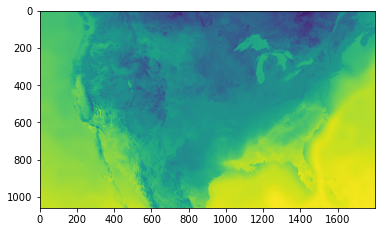

In [8]:
import matplotlib.pyplot as plt

plt.imshow(img.data[0,:,:])

Can I get the titiler stuff to work? [Demo](https://developmentseed.org/titiler/examples/notebooks/Working_with_CloudOptimizedGeoTIFF_simple/)

In [ ]:
import json
import httpx
from folium import Map, TileLayer

%pylab inline

In [ ]:
#titiler_endpoint = "https://titiler.xyz"  # Developmentseed Demo endpoint. Please be kind.
titiler_endpoint = "http://127.0.0.1:8000"
oil_url = "https://opendata.digitalglobe.com/events/mauritius-oil-spill/post-event/2020-08-12/105001001F1B5B00/105001001F1B5B00.tif"
hrrr_url = "s3://hrrrzarr/sfc/20210101/20210101_00z_anl.zarr/surface/TMP/surface/TMP"

In [ ]:
# Fetch File Metadata to get min/max rescaling values (because the file is stored as float32)
oil_r = httpx.get(
    f"{titiler_endpoint}/cog/info",
    params = {
        "url": oil_url,
    }
).json()

oil_bounds = oil_r["bounds"]
print(oil_r)

# Fetch File Metadata to get min/max rescaling values (because the file is stored as float32)
hrrr_r = httpx.get(
    f"{titiler_endpoint}/cog/info",
    params = {
        "url": hrrr_url,
    },
    timeout=60
).json()


print(hrrr_r)
hrrr_bounds = hrrr_r["bounds"]

In [ ]:
# Fetch File Metadata to get min/max rescaling values (because the file is stored as float32)
oil_r = httpx.get(
    f"{titiler_endpoint}/cog/statistics",
    params = {
        "url": oil_url,
    },
    timeout=10
).json()

print(json.dumps(oil_r, indent=4))

# Fetch File Metadata to get min/max rescaling values (because the file is stored as float32)
hrrr_r = httpx.get(
    f"{titiler_endpoint}/cog/statistics",
    params = {
        "url": hrrr_url,
    },
    timeout=200
).json()

print(json.dumps(hrrr_r, indent=4))

In [ ]:
r = httpx.get(
    f"{titiler_endpoint}/cog/tilejson.json",
    params = {
        "url": hrrr_url,
    },
    timeout=200
).json()
print(r)

m = Map(
    location=((bounds[1] + bounds[3]) / 2,(bounds[0] + bounds[2]) / 2),
    zoom_start=13
)

aod_layer = TileLayer(
    tiles=r["tiles"][0],
    opacity=1,
    attr="DigitalGlobe OpenData"
)
aod_layer.add_to(m)
m

In [ ]:

url = "https://data.geo.admin.ch/ch.swisstopo.swissalti3d/swissalti3d_2019_2573-1085/swissalti3d_2019_2573-1085_0.5_2056_5728.tif"

# Fetch File Metadata to get min/max rescaling values (because the file is stored as float32)
r = httpx.get(
    f"{titiler_endpoint}/cog/info",
    params = {
        "url": url,
    }
).json()

print(r)
print("Data is of type:", r["dtype"])

# This dataset has statistics metadata
minv, maxv = r["band_metadata"][0][1]["STATISTICS_MINIMUM"], r["band_metadata"][0][1]["STATISTICS_MAXIMUM"]
print("With values from ", minv, "to ", maxv)



In [ ]:
# We could get the min/max values using the statistics endpoint
r = httpx.get(
    f"{titiler_endpoint}/cog/statistics",
    params = {
        "url": url,
    }
).json()

print(json.dumps(r["1"], indent=4))

In [ ]:
r = httpx.get(
    f"{titiler_endpoint}/cog/tilejson.json",
    params = {
        "url": url,
    }
).json()

bounds = r["bounds"]
m = Map(
    location=((bounds[1] + bounds[3]) / 2,(bounds[0] + bounds[2]) / 2),
    zoom_start=r["minzoom"] + 1
)

aod_layer = TileLayer(
    tiles=r["tiles"][0],
    opacity=1,
    attr="Swisstopo"
)
aod_layer.add_to(m)
m

In [ ]:
r = httpx.get(
    f"{titiler_endpoint}/cog/tilejson.json",
    params = {
        "url": url,
        "rescale": f"{minv},{maxv}"
    }
).json()

bounds = r["bounds"]
m = Map(
    location=((bounds[1] + bounds[3]) / 2,(bounds[0] + bounds[2]) / 2),
    zoom_start=r["minzoom"] + 1
)

aod_layer = TileLayer(
    tiles=r["tiles"][0],
    opacity=1,
    attr="Swisstopo"
)
aod_layer.add_to(m)
m

In [ ]:
r = httpx.get(
    f"{titiler_endpoint}/cog/tilejson.json",
    params = {
        "url": url,
        "rescale": f"{minv},{maxv}",
        "colormap_name": "terrain"
    }
).json()

bounds = r["bounds"]
m = Map(
    location=((bounds[1] + bounds[3]) / 2,(bounds[0] + bounds[2]) / 2),
    zoom_start=r["minzoom"] + 1
)

aod_layer = TileLayer(
    tiles=r["tiles"][0],
    opacity=1,
    attr="Swisstopo"
)
aod_layer.add_to(m)
m

In [ ]:
import json

cmap = json.dumps(
    [
        # ([min, max], [r, g, b, a])
        ([0, 1500], [255,255,204, 255]),
        ([1500, 1700], [161,218,180, 255]),
        ([1700, 1900], [65,182,196, 255]),
        ([1900, 2000], [44,127,184, 255]),
        ([2000, 3000], [37,52,148, 255]),
    ]
)
# https://colorbrewer2.org/#type=sequential&scheme=YlGnBu&n=5

r = httpx.get(
    f"{titiler_endpoint}/cog/tilejson.json",
    params = {
        "url": url,
        "colormap": cmap
    }
).json()

bounds = r["bounds"]
m = Map(
    location=((bounds[1] + bounds[3]) / 2,(bounds[0] + bounds[2]) / 2),
    zoom_start=r["minzoom"] + 1
)

aod_layer = TileLayer(
    tiles=r["tiles"][0],
    opacity=1,
    attr="Swisstopo"
)
aod_layer.add_to(m)
m

[NumpyTile demo](https://developmentseed.org/titiler/examples/notebooks/Working_with_NumpyTile/)

In [ ]:
import httpx
import mercantile
from io import BytesIO
import numpy

In [ ]:
titiler_endpoint = "https://titiler.xyz"  # Developmentseed Demo endpoint. Please be kind.
url = "https://opendata.digitalglobe.com/events/mauritius-oil-spill/post-event/2020-08-12/105001001F1B5B00/105001001F1B5B00.tif"

In [ ]:
r = httpx.get(f"{titiler_endpoint}/cog/tilejson.json?url={url}").json()
print(r)

In [ ]:
# Get a list of tiles for minzoom + 2

tiles = list(mercantile.tiles(*r["bounds"], r["minzoom"] + 2))

In [ ]:
# Call TiTiler endpoint using the first tile

tile = tiles[0]
r = httpx.get(f"{titiler_endpoint}/cog/tiles/{tile.z}/{tile.x}/{tile.y}.npy?url={url}")

In [ ]:
# Load result using numpy.load

arr = numpy.load(BytesIO(r.content))
print(type(arr))
print(arr.shape)

In [ ]:
# By default we put the data and the mask in the same array
tile, mask = arr[0:-1], arr[-1]

In [ ]:
print(tile.shape)

In [ ]:
print(mask.shape)